In [389]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels

%matplotlib inline

In [390]:
experiments = pd.read_csv('experiments.csv')
participants = pd.read_csv('participants.csv', sep=';')

In [391]:
experiments.head()

,Participant ID,Current Weight (lbs),BMR (Calories),Daily Calories Consumed,Daily Caloric Surplus/Deficit,Weight Change (lbs),Duration (weeks),Physical Activity Level,Sleep Quality,Stress Level,Final Weight (lbs)
0,1,228.4,3102.3,3916.0,813.7,0.2,1,Sedentary,Excellent,6,228.6
1,2,165.4,2275.5,3823.0,1547.5,2.4,6,Very Active,Excellent,6,167.8
2,3,142.8,2119.4,2785.4,666.0,1.4,7,Sedentary,Good,3,144.2
3,4,145.5,2181.3,2587.3,406.0,0.8,8,Sedentary,Fair,2,146.3
4,5,155.5,2463.8,3312.8,849.0,2.0,10,Lightly Active,Good,1,157.5


In [392]:
experiments.tail()

,Participant ID,Current Weight (lbs),BMR (Calories),Daily Calories Consumed,Daily Caloric Surplus/Deficit,Weight Change (lbs),Duration (weeks),Physical Activity Level,Sleep Quality,Stress Level,Final Weight (lbs)
95,96,181.9,2622.8,3656.2,1033.4,0.60000,2,Lightly Active,Excellent,3,182.5
96,97,116.5,1736.5,2756.5,1020.0,-8.92309,12,Moderately Active,Good,9,107.6
97,98,162.7,2188.6,3344.3,1155.8,3.60000,12,Lightly Active,Fair,7,166.3
98,99,179.8,2671.9,4000.0,1328.1,2.00000,5,Moderately Active,Fair,5,181.8
99,100,185.2,2830.7,4000.0,1169.3,2.70000,9,Very Active,Fair,7,187.9


In [393]:
participants.head()

,Participant ID,Age,Gender
0,1,56,M
1,2,46,F
2,3,32,F
3,4,25,F
4,5,38,M


In [394]:
participants.tail()

,Participant ID,Age,Gender
95,96,59,M
96,97,56,F
97,98,58,F
98,99,45,M
99,100,24,M


In [395]:
experiments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Participant ID                 100 non-null    int64  
 1   Current Weight (lbs)           100 non-null    float64
 2   BMR (Calories)                 100 non-null    float64
 3   Daily Calories Consumed        100 non-null    float64
 4   Daily Caloric Surplus/Deficit  100 non-null    float64
 5   Weight Change (lbs)            100 non-null    float64
 6   Duration (weeks)               100 non-null    int64  
 7   Physical Activity Level        100 non-null    object 
 8   Sleep Quality                  100 non-null    object 
 9   Stress Level                   100 non-null    int64  
 10  Final Weight (lbs)             100 non-null    float64
dtypes: float64(6), int64(3), object(2)
memory usage: 8.7+ KB


In [396]:
participants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Participant ID  100 non-null    int64 
 1   Age             100 non-null    int64 
 2   Gender          100 non-null    object
dtypes: int64(2), object(1)
memory usage: 2.5+ KB


In [397]:
experiments = experiments.rename(str.lower, axis='columns')
experiments.columns = experiments.columns.str.replace('\s', '_', regex=True).str.replace('[^_\w]', '', regex=True)
experiments = experiments.rename(columns={'daily_caloric_surplusdeficit': 'daily_caloric_surplus_or_deficit'})
participants = participants.rename(str.lower, axis='columns')
participants.columns = participants.columns.str.replace('\s', '_', regex=True)

In [398]:
experiments.columns

Index(['participant_id', 'current_weight_lbs', 'bmr_calories',
       'daily_calories_consumed', 'daily_caloric_surplus_or_deficit',
       'weight_change_lbs', 'duration_weeks', 'physical_activity_level',
       'sleep_quality', 'stress_level', 'final_weight_lbs'],
      dtype='object')

In [399]:
participants.columns

Index(['participant_id', 'age', 'gender'], dtype='object')

In [400]:
experiments = experiments.drop_duplicates()
participants = participants.drop_duplicates()

In [401]:
print(experiments.nunique(), '\n')
print(participants.nunique())

participant_id                      100
current_weight_lbs                   94
bmr_calories                        100
daily_calories_consumed              67
daily_caloric_surplus_or_deficit    100
weight_change_lbs                    71
duration_weeks                       12
physical_activity_level               4
sleep_quality                         4
stress_level                          9
final_weight_lbs                     97
dtype: int64 

participant_id    100
age                40
gender              2
dtype: int64


In [402]:
full_data = experiments.merge(participants, on='participant_id')

In [403]:
full_data.head()

,participant_id,current_weight_lbs,bmr_calories,daily_calories_consumed,daily_caloric_surplus_or_deficit,weight_change_lbs,duration_weeks,physical_activity_level,sleep_quality,stress_level,final_weight_lbs,age,gender
0,1,228.4,3102.3,3916.0,813.7,0.2,1,Sedentary,Excellent,6,228.6,56,M
1,2,165.4,2275.5,3823.0,1547.5,2.4,6,Very Active,Excellent,6,167.8,46,F
2,3,142.8,2119.4,2785.4,666.0,1.4,7,Sedentary,Good,3,144.2,32,F
3,4,145.5,2181.3,2587.3,406.0,0.8,8,Sedentary,Fair,2,146.3,25,F
4,5,155.5,2463.8,3312.8,849.0,2.0,10,Lightly Active,Good,1,157.5,38,M


<Axes: xlabel='age', ylabel='Count'>

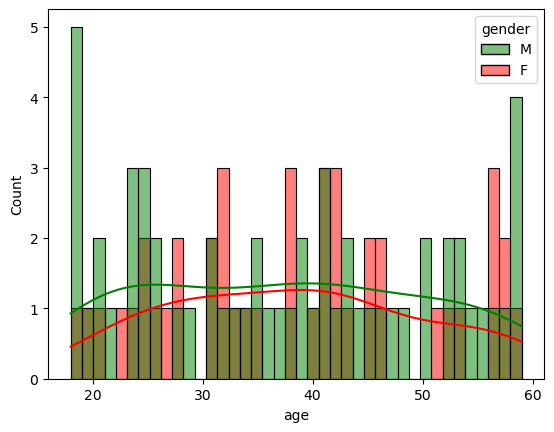

In [419]:
sns.histplot(data=full_data, x='age', hue='gender', palette=['green', 'red'], bins=40, kde=True)

<Axes: xlabel='gender', ylabel='age'>

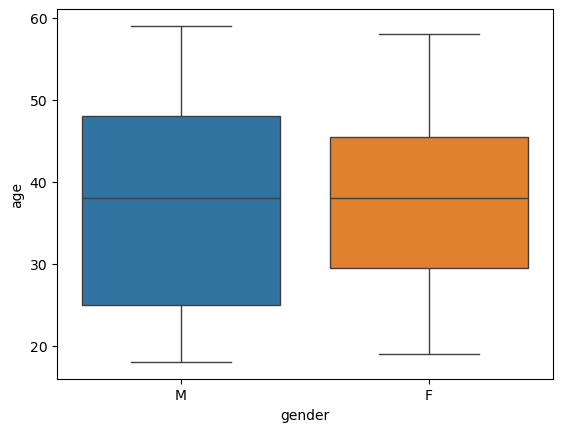

In [424]:
sns.boxplot(data=full_data, x='gender', y='age', hue='gender')

In [421]:
full_data.loc[full_data.gender == 'M'].age.describe()

count    57.000000
mean     37.561404
std      12.889666
min      18.000000
25%      25.000000
50%      38.000000
75%      48.000000
max      59.000000
Name: age, dtype: float64

In [422]:
full_data.loc[full_data.gender == 'F'].age.describe()

count    43.000000
mean     38.372093
std      11.403891
min      19.000000
25%      29.500000
50%      38.000000
75%      45.500000
max      58.000000
Name: age, dtype: float64

Судя по всему, эксперименты заключались в отслеживании результатов похудения (?). Если предположить, что участие люди принимали на добровольной основе (никто не выбирал их случайным образом на улице), то выводы можно сделать следующие: 
* Если посмотреть на кривую плотности распределения женщин по возрастам можно сказать, что интерес к подобному эксперименту у них возрастал примерно до 40 лет, после чего начал снижаться.
* Мужчины в целом высказали больший интерес, чем женщины, независимо от возраста. В их распределении имеются сильные выбросы с краев и в первой трети графика, из-за чего тяжело сказать наверняка, но в целом, можно считать распределения примерно сопоставимыми по форме (оба похожи на хи-квадрат с df ~ 5)

In [425]:
def corrdot(*args, **kwargs):
    corr_r = args[0].corr(args[1], 'pearson')
    corr_text = f"{corr_r:2.2f}".replace("0.", ".")
    ax = plt.gca()
    ax.set_axis_off()
    marker_size = abs(corr_r) * 10000
    ax.scatter([.5], [.5], marker_size, [corr_r], alpha=0.6, cmap="coolwarm",
               vmin=-1, vmax=1, transform=ax.transAxes)
    font_size = abs(corr_r) * 40 + 5
    ax.annotate(corr_text, [.5, .5,],  xycoords="axes fraction",
                ha='center', va='center', fontsize=font_size)

D:\Apps\Anaconda\envs\my_env\lib\site-packages\seaborn\axisgrid.py:1550: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(x=data_k, label=label_k, color=color, **plot_kwargs)
D:\Apps\Anaconda\envs\my_env\lib\site-packages\seaborn\axisgrid.py:1550: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(x=data_k, label=label

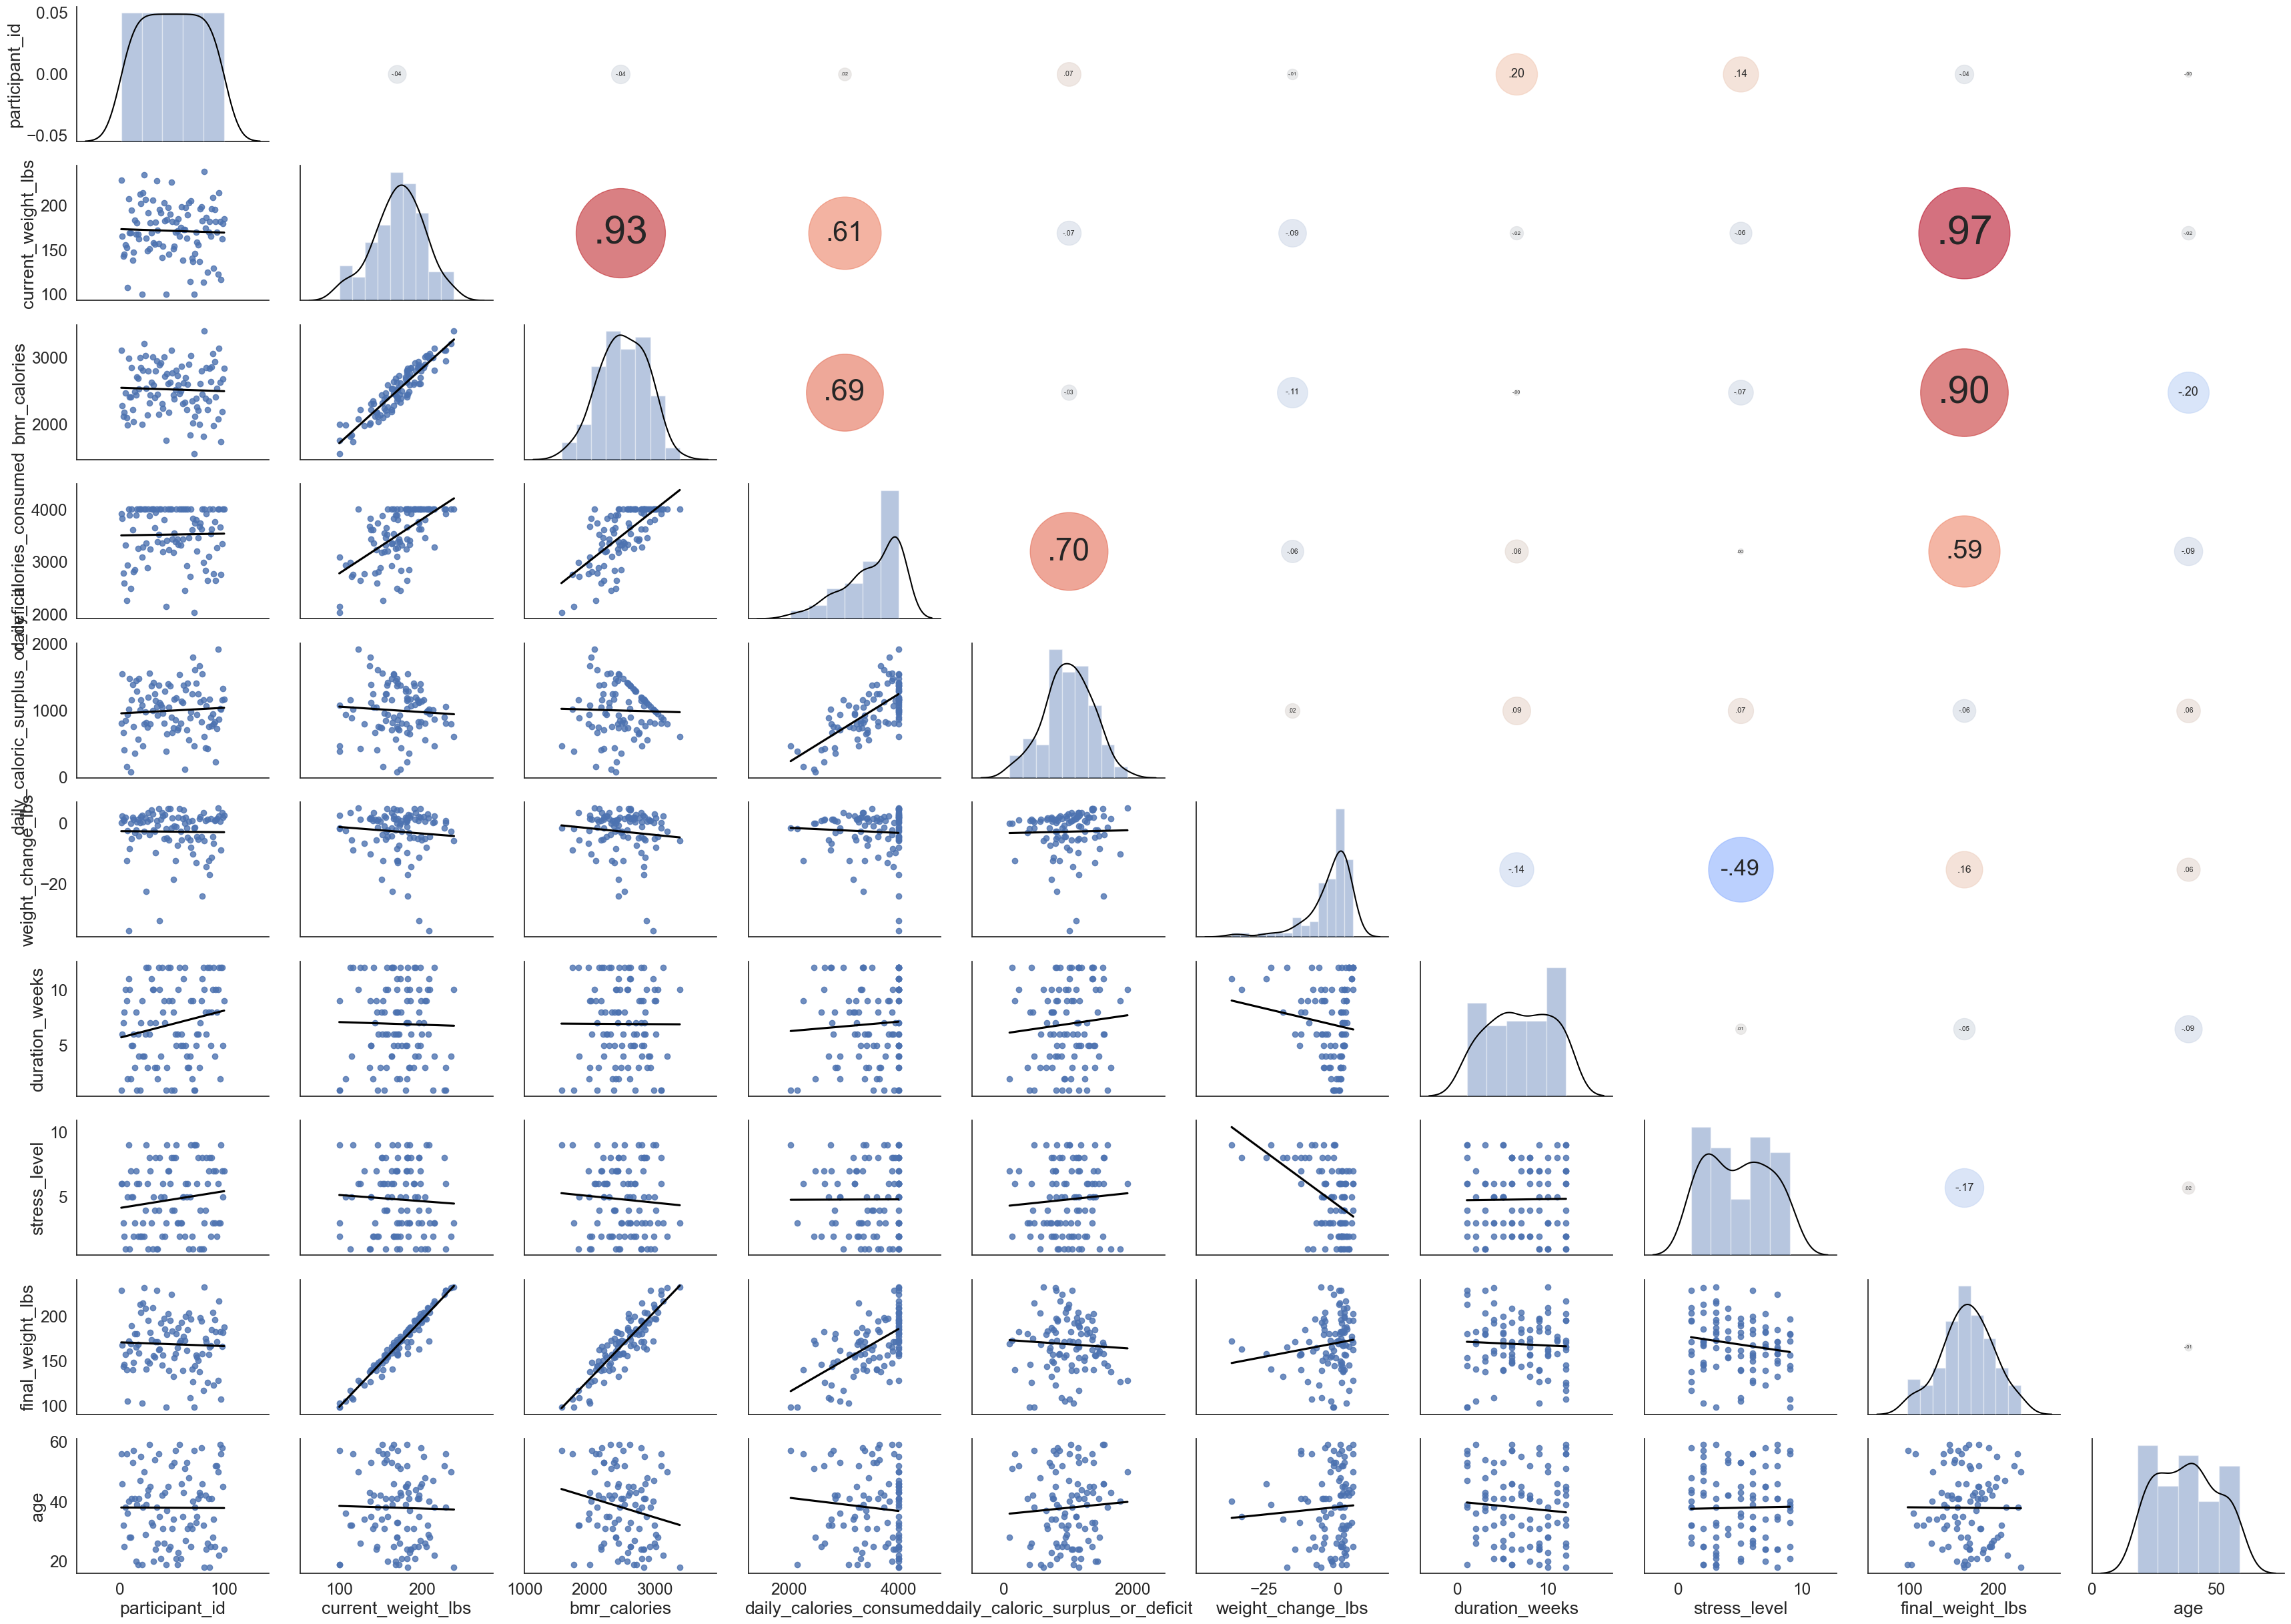

In [431]:
sns.set(style='white', font_scale=1.6)
g = sns.PairGrid(data=full_data, aspect=1.4, diag_sharey=False)
g.map_lower(sns.regplot, ci=False, line_kws={'color': 'black'})
g.map_diag(sns.distplot, kde_kws={'color': 'black'})
g.map_upper(corrdot)